### **Libraries**

In [1]:
import numpy as np
from numpy import *
from math import pi
import matplotlib as mpl
from matplotlib import animation
from matplotlib import pyplot as plt
from time import sleep
from IPython.display import clear_output

### **Formating**

In [2]:
mpl.rcParams['axes.linewidth'] = 1 #set the value globally
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1

mpl.rcParams['font.family'] = 'sans-serif'


mpl.rcParams.update({'font.size': 16}) #Change function call

### **Relevant Functions**

In [3]:
def cenDiff(x,y): #4th order central difference stencil method
    
    if size(x) != size(y): #Check for simmilar size between x and y
        print("x and y not the same size!")
        return
    
    nx = size(x) #Get the number of x values
    dydx = zeros(nx) #Create an array of 0's with a simmilar size to x as stored in nx
    h = 0.001
    
    dydx[0] = (((-3*y[0]) + (4*y[1]) + (-1*y[2])) / (2*h)) / (((-3*x[0]) + (4*x[1]) + (-1*x[2])) / (2*h))
    dydx[1] = (((-3*y[0+1]) + (4*y[1+1]) + (-1*y[2+1])) / (2*h)) / (((-3*x[0+1]) + (4*x[1+1]) + (-1*x[2+1])) / (2*h))
    
    for i in range(2,nx-2):
        dydx[i] = (((y[i-2]) - (8*y[i-1]) + (8*y[i+1]) - (y[i+2])) / (12*h)) / (((x[i-2]) - (8*x[i-1]) + (8*x[i+1]) - (x[i+2])) / (12*h))
    
    dydx[-1] = (((3*y[nx-1]) + (-4*y[nx-2]) + (y[nx-3])) / (2*h)) / (((3*x[nx-1]) + (-4*x[nx-2]) + (x[nx-3])) / (2*h))
    dydx[-2] = (((3*y[nx-1-1]) + (-4*y[nx-2-1]) + (y[nx-3-1])) / (2*h)) / (((3*x[nx-1-1]) + (-4*x[nx-2-1]) + (x[nx-3-1])) / (2*h))
    
    return dydx #Return the dydx list

def dataLoad(path, filename, col1): #Load data, from (path+filename) pull from (col1) columns
    time = loadtxt(path+"/"+filename, usecols=(0), unpack=True)
    outData = loadtxt(path+"/"+filename, usecols=(col1[0], col1[1], col1[2]), unpack=True)
    return(time, outData) #Return (time) and (outData), as an array

def getData2D(time, QzzDat, theta=[np.pi/2], derivType=0):
    #[/] What does this function do?
    #Load in data from a given file, using two coloumns (0,col1).
    #Run it through an equation to extract the gravitational wave (GW) signal.
    #Return GW signal and time as h, t respectively

    #t, Qzz = loadtxt(filename, usecols=(0,col1), unpack=True) #Load in data (0,col1) from file 
    QddotZZ = cenDiff(time,QzzDat) #Get the dy/dx (dQzz/dt) values for the data 
    
    #[/] Want Newton's constant divided by the speed of light to the fourth power: G/c^4 [in cgs units]
    Gc4 = (6.674E-8) / (2.997E10)**4  
    
    #[/] Want 10 Kilaparsecs converted to cm
    distance = 10 * (3.085677E21) 
    
    if derivType == 0:
        #[/] Want Equation (3) from this paper (ignore the sin^2 term for now): https://arxiv.org/pdf/2011.09000.pdf
        h = (3/2) * (Gc4/distance) * QddotZZ 
    
    else:
        hConstants = (3/2) * (Gc4/distance) * (np.sin(theta)**2)
        
        h = np.outer(QddotZZ,hConstants)
        
    return time, h

def get2D(time, fullQzzDat, tbounce=0.0, theta=[np.pi/2], viewAngleYN=0):
    """
    Input:
        path : the path of flash.dat file
        fname: the file name of flash.dat
        tbounce: the bounce time in seconds

    Output:
        time:
        hplus50:
        hplus150:
        hplusInf:
        hplusTot:
    """
    #fn  = path+"/"+fname
    
    #Below you will input column numbers from the .dat files you worked with last week
    
    t1, hplus50  = getData2D(time, fullQzzDat[0], theta, viewAngleYN) #[/] Want the "ddI yy r<50km" column here (be careful of python indexing)
    t1, hplus150 = getData2D(time, fullQzzDat[1], theta, viewAngleYN) #[/] Want the "ddI yy 50<r<150" column here
    t1, hplusInf = getData2D(time, fullQzzDat[2], theta, viewAngleYN) #[/] Want the "ddI yy r>150km" column here
    
    hplusTot = hplus50 + hplus150 + hplusInf

    time = t1 - tbounce

    return time, hplus50, hplus150, hplusInf, hplusTot

### **Import Data**

In [6]:
#Load requisite data
path = r'C:\Users\crazy\PajkosResearch'

fname_s12 = 's12_o0_2D_gw2.dat'
fname_s40 = 's40_o0_2D_gw2.dat'

colNumsSseries = [47, 53, 59] #Initialize columns to pull from

timeData_S12, QzzData_s12 = dataLoad(path, fname_s12, colNumsSseries) #Load in data
timeData_s40, QzzData_s40 = dataLoad(path, fname_s40, colNumsSseries) #Load in data

### **Work**

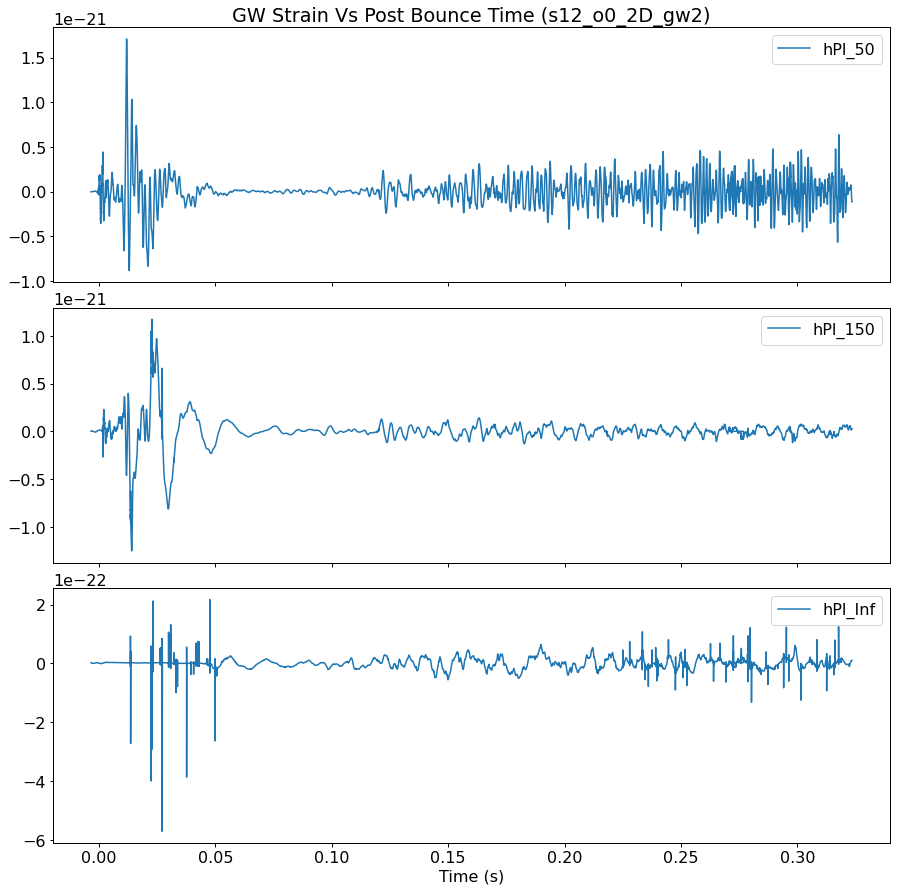

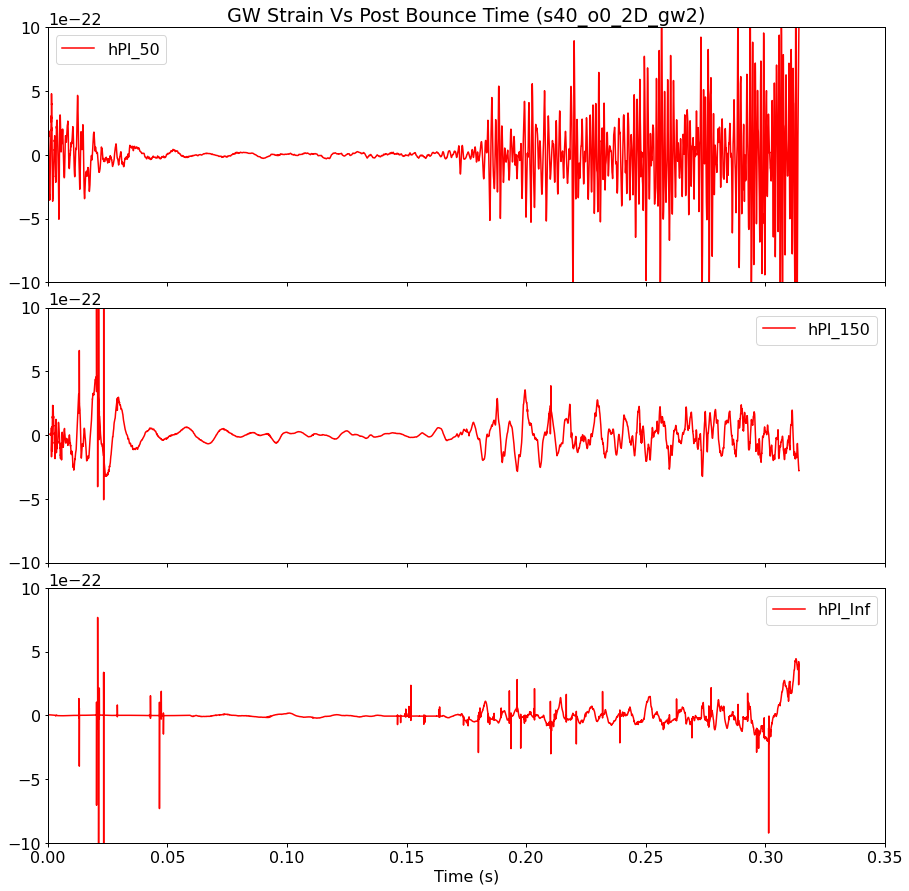

In [7]:
###Main program###

#Bounce times
#0.184469701 [sec] for s12
#0.366373606 [sec] for s40
tbounce_s12 = 0.184469701 #[sec] (s12)
tbounce_s40 = 0.366373606 #[sec] (s40)

#[/] Below unpack the necessary variables
timePB_s12, hPl50_s12, hPl150_s12, hPlInf_s12, hPlTot_s12 = get2D(timeData_S12, QzzData_s12, tbounce_s12)
timePB_s40, hPl50_s40, hPl150_s40, hPlInf_s40, hPlTot_s40 = get2D(timeData_s40, QzzData_s40, tbounce_s40)


#In a 3 row subplot, plot the GW strain (h) vs post bounce time (t_pb) produced from (don't forget your legend):
#s12_o0_2D_gw2 plots
fig, ax1 = plt.subplots(3, sharex=True)
fig.set_size_inches(15,15)
fig.subplots_adjust(hspace=0.10)

ax1[0].plot(timePB_s12, hPl50_s12, label = 'hPl_50') #[/] the inner 50 km
ax1[1].plot(timePB_s12, hPl150_s12, label = 'hPl_150') #[/] 50 km < X < 150 km
ax1[2].plot(timePB_s12, hPlInf_s12, label = 'hPl_Inf') #[/] 150 km < X

ax1[2].set_xlabel('Time (s)')
ax1[0].set_title('GW Strain Vs Post Bounce Time (s12_o0_2D_gw2)')

ax1[0].legend()
ax1[1].legend()
ax1[2].legend()

#s40_o0_2D_gw2 plots
fig, ax2 = plt.subplots(3, sharex=True)
fig.set_size_inches(15,15)
fig.subplots_adjust(hspace=0.10)

ax2[0].plot(timePB_s40, hPl50_s40, label = 'hPl_50', c = 'r') #[/] the inner 50 km
ax2[1].plot(timePB_s40, hPl150_s40, label = 'hPl_150', c = 'r') #[/] 50 km < X < 150 km
ax2[2].plot(timePB_s40, hPlInf_s40, label = 'hPl_Inf', c = 'r') #[/] 150 km < X

ax2[2].set_xlabel('Time (s)')
ax2[0].set_title('GW Strain Vs Post Bounce Time (s40_o0_2D_gw2)')

ax2[0].set_xlim([0,0.35])
ax2[1].set_xlim([0,0.35])
ax2[2].set_xlim([0,0.35])

yLow = -1e-21
yHigh = 1e-21

ax2[0].set_ylim([yLow,yHigh])
ax2[1].set_ylim([yLow,yHigh])
ax2[2].set_ylim([yLow,yHigh])

ax2[0].legend()
ax2[1].legend()
ax2[2].legend()

#[/] Which region do most of the GWs get produced from?
#In both progenitors about 0.10 to 0.15 onwards

#[/] Which progenitor (s12 or s40) produces more GWs? 
#s12

#[/] Create a new function that replaces 'cenDiff()' but uses a 4th order central difference stencil
#   (see here) https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf

#[/] Recompute the GW strains, does it drastically modify the results?
#No, they look fairly simmilar
#The biggest noticable difference is the scale

In [8]:
#Initialize variables
tbounce_s12 = 0.184469701 #[sec] (s12)
tbounce_s40 = 0.366373606 #[sec] (s40)

viewAngle = np.linspace(0,np.pi,100) #Set up viewing angles

#Run calculations with viewing angles
timePB_s12, hPl50_s12, hPl150_s12, hPlInf_s12, hPlTot_s12 = get2D(timeData_S12, QzzData_s12, tbounce_s12, viewAngle, 1)
timePB_s40, hPl50_s40, hPl150_s40, hPlInf_s40, hPlTot_s40 = get2D(timeData_s40, QzzData_s40, tbounce_s40, viewAngle, 1)


(-2e-21, 2e-21)

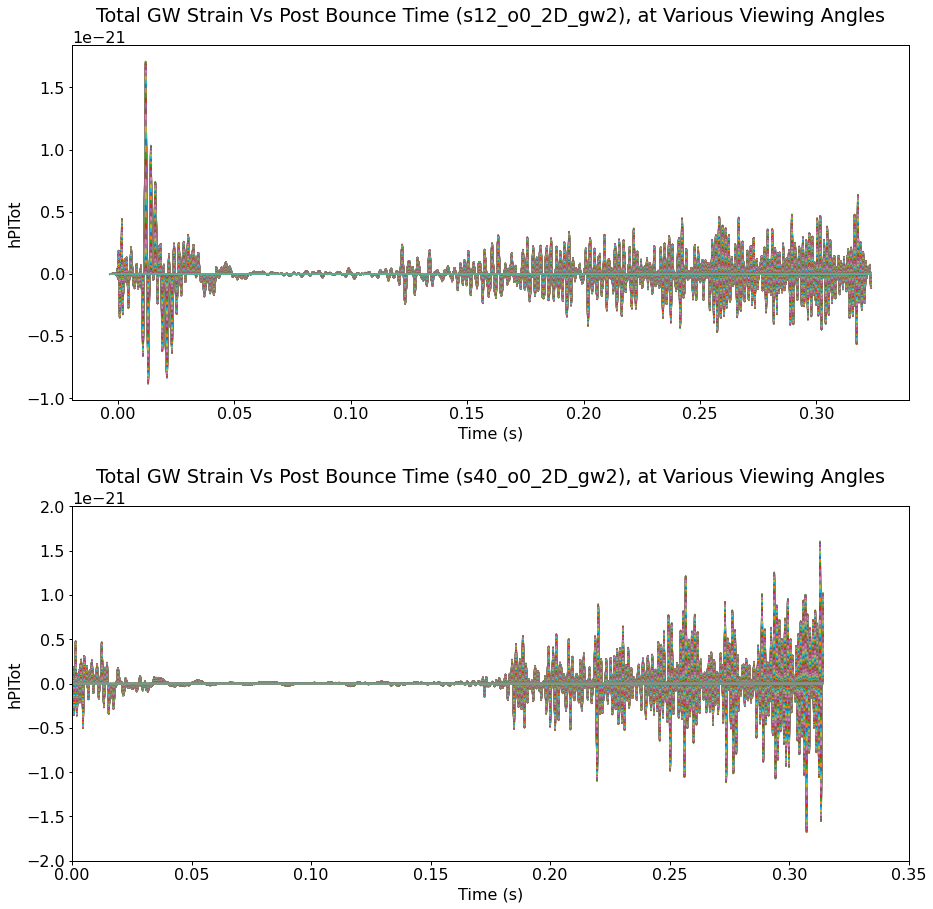

In [9]:
#total GW strain (sum h from the 3 regions) vs post bounce time (t_pb) 
#produced at viewing angles of pi/2, pi/4, 0
fig, ax1 = plt.subplots(2)
fig.set_size_inches(15,15)
fig.subplots_adjust(hspace=0.30)

#Plot from s12 data
ax1[0].plot(timePB_s12, hPl50_s12[:])

ax1[0].set_xlabel('Time (s)')
ax1[0].set_ylabel('hPlTot')
ax1[0].set_title('Total GW Strain Vs Post Bounce Time (s12_o0_2D_gw2), at Various Viewing Angles', y=1.05)

#Plot from s12 data
ax1[1].plot(timePB_s40, hPl50_s40[:])

ax1[1].set_xlabel('Time (s)')
ax1[1].set_ylabel('hPlTot')
ax1[1].set_title('Total GW Strain Vs Post Bounce Time (s40_o0_2D_gw2), at Various Viewing Angles', y=1.05)

ax1[1].set_xlim([0,0.35])

yLow = -2e-21
yHigh = 2e-21

ax1[1].set_ylim([yLow,yHigh])
ax1[1].set_ylim([yLow,yHigh])
ax1[1].set_ylim([yLow,yHigh])

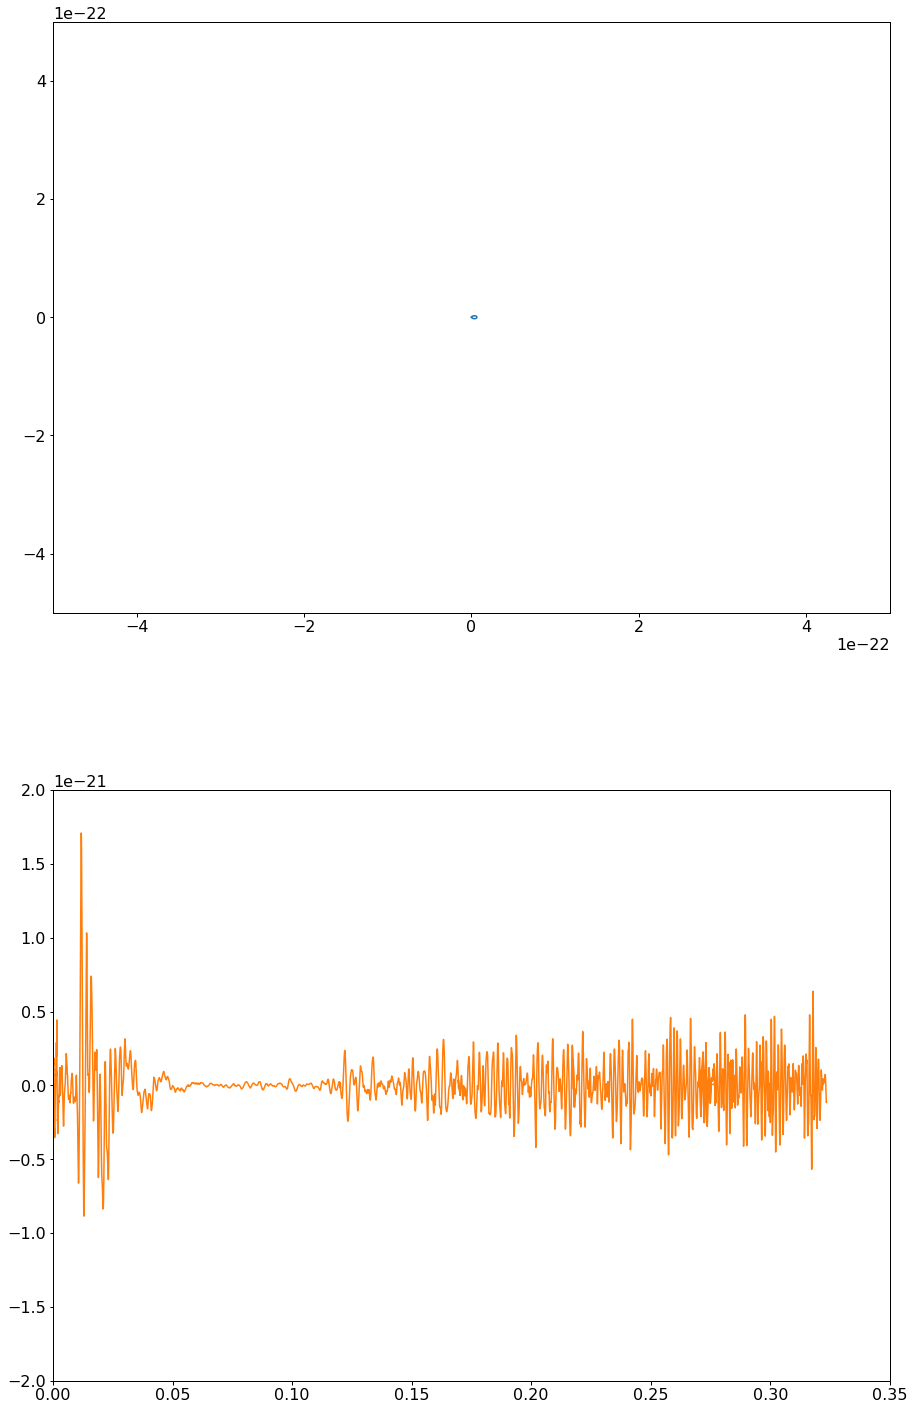

In [10]:
#Initialize plotting figure
fig, ax1 = plt.subplots(2)
fig.set_size_inches(15,25)
fig.subplots_adjust(hspace=0.30)
GWstrPlot1, = ax1[0].plot([], [])
GWstrPlot2, = ax1[1].plot([], [])

#Initialize plotting vars
hlistNumTop = 99
hlistNumBot = 50
scaleXYStrain = 0.5e-21
scaleYH = 2e-21

#Initialize plots within the figure 
ax1[1].plot(timePB_s12, hPl50_s12[:,hlistNumBot])

ax1[0].set_xlim(-scaleXYStrain,scaleXYStrain)
ax1[0].set_ylim(-scaleXYStrain,scaleXYStrain)

ax1[1].set_xlim([0,0.35])
ax1[1].set_ylim([-scaleYH,scaleYH])

#Initialzie science/math vars
viewAngle = np.linspace(0,np.pi,100) #Set up viewing angles
frameCnt = 10 #Frame count
stepValue = 500

def init(): #Define frame initial state 
    GWstrPlot1.set_data([],[])
    GWstrPlot2.set_data([],[])
    return GWstrPlot1, GWstrPlot2,
    
def strainAnimation(i): #Define animation function

    #r = np.absolute(hPl50_s12[:,hlistNum][stepValue*i])
    #r = np.absolute(hPl50_s12[stepValue*i,hlistNum])
    r = hPl50_s12[stepValue*i]

    x = r * np.sin(viewAngle)
    y = r * np.cos(viewAngle)
    
#     rT = hPl50_s12[:,hlistNum][stepValue*i] * (1 + np.cos(viewAngle))
    
#     x = rT * np.sin(viewAngle)
#     y = rT * np.cos(viewAngle)
    
    GWstrPlot1.set_data(x, y)
    GWstrPlot2.set_data([timePB_s12[stepValue*i],timePB_s12[stepValue*i]],[-scaleYH,scaleYH])
    
    return GWstrPlot1, GWstrPlot2,
    
#animStrainPlot = animation.FuncAnimation(fig, strainAnimation, init_func=init, frames=frameCnt, interval = 80, blit = False)
#animStrainPlot.save('GWStrainAnimation.gif', writer='imagemagick') #Save animation

In [ ]:
#Initialize plotting vars
hlistNumTop = 99
hlistNumBot = 50

StrainPltLim = 0.5e-21
ScalePltLim = 2e-21

#frameCt = 300 #Frame count
#stepValue = len(hPl50_s12)//frameCt #Data step-over value
stepValue = 1
calcRange = range(0,100,100)
prefix = 'CombinedPlotAlt'
path = 'AnimationgImgStore/'

def ugAnimation2():
    strainXY = []
    arrowArrayFull = []
    iterLineXY = []
    
    count = 0 #FileName count
    
    for i in calcRange:
        #Calculate Strain x,y
        r = hPl50_s12[timePB_s12 > 0][stepValue*i]
        strainX = r * np.sin(viewAngle)
        strainY = r * np.cos(viewAngle)
        
        #Calculate maxStrain viewangle
        rad = np.sqrt((strainX**2) + (strainY**2))
        arrowArray = np.array([[0,0], [strainX[np.argmax(rad)],strainY[np.argmax(rad)]]])
        
        #Calculate iterator line pos
        xIterLine = timePB_s12[timePB_s12 > 0][stepValue*i]
        yIterLine = timePB_s12[timePB_s12 > 0][stepValue*i]
        
        #Store calculated values
        strainXY.append([strainX,strainY])
        arrowArrayFull.append(arrowArray)
        iterLineXY.append([xIterLine,yIterLine])
        
    for i in range(len(arrowArrayFull)):
        #Initialize plotting figure
        fig = plt.figure(figsize = (15,15))
        ax1 = plt.subplot(2,1,1)
        ax2 = plt.subplot(2,1,2)
        #ax3 = plt.subplot(2,1,2)
        
        #Initialize plots within the figure 
        #ax1 GW plot, with iterable 
        ax1.plot(timePB_s12[timePB_s12 > 0], hPl50_s12[timePB_s12 > 0][:,hlistNumBot])
        ax1.set_xlim([0,0.35])
        ax1.set_ylim([-ScalePltLim,ScalePltLim])

        #ax2 strain/viewangle plot
        ax2.set_xlim(-StrainPltLim,StrainPltLim)
        ax2.set_ylim(-StrainPltLim,StrainPltLim)

        #Data assignment
        ax1.plot([iterLineXY[i][0],iterLineXY[i][1]],[-ScalePltLim,ScalePltLim])
        ax2.plot(strainXY[i][0],strainXY[i][1])
        ax2.plot(arrowArrayFull[i][:,0],arrowArrayFull[i][:,1])
        
        ax1.axis('off')
        ax2.axis('off')
        
        #Animation portion
#         plt.show()
#         sleep(0.01)
#         clear_output(wait=True)        
    
        i_str = str(count)
        suffix = i_str.rjust(4,'0')
        fig.savefig(path + prefix + suffix + '.jpeg')
        plt.clf()
        count += 1
        
        if i == 0:
            fig = plt.figure(figsize = (15,15))
            ax1 = plt.subplot(2,1,1)
            ax2 = plt.subplot(2,1,2)
        
            ax1.plot()
            ax1.set_xlim([0,0.35])
            ax1.set_ylim([-ScalePltLim,ScalePltLim])
            ax1.set_title('GW Strain Vs Post Bounce Time (s12_o0_2d_gw2) (hPI_50)')
            ax1.set_xlabel('Time(s)')
            ax1.set_ylabel('Strain')
            ax1.axis('on')
            
            ax2.plot()
            ax2.set_xlim(-StrainPltLim,StrainPltLim)
            ax2.set_ylim(-StrainPltLim,StrainPltLim)
            ax2.set_title('ViewAngle')
            ax2.axis('on')
            
            fig.savefig(path + prefix + 'axes' + '.png', transparent=True)
            plt.clf()
            
            
    return()

#ugAnimation2() 

#ffmpeg -i CombinedPlot%04d.jpeg movie.mp4
#ffmpeg -i movie.mp4 -i CombinedPlotaxes.png -filter_complex overlay=0:0 fullPlt.mp4
#Add title and label axes

Text(0.5, 0, 'Z-Axis')

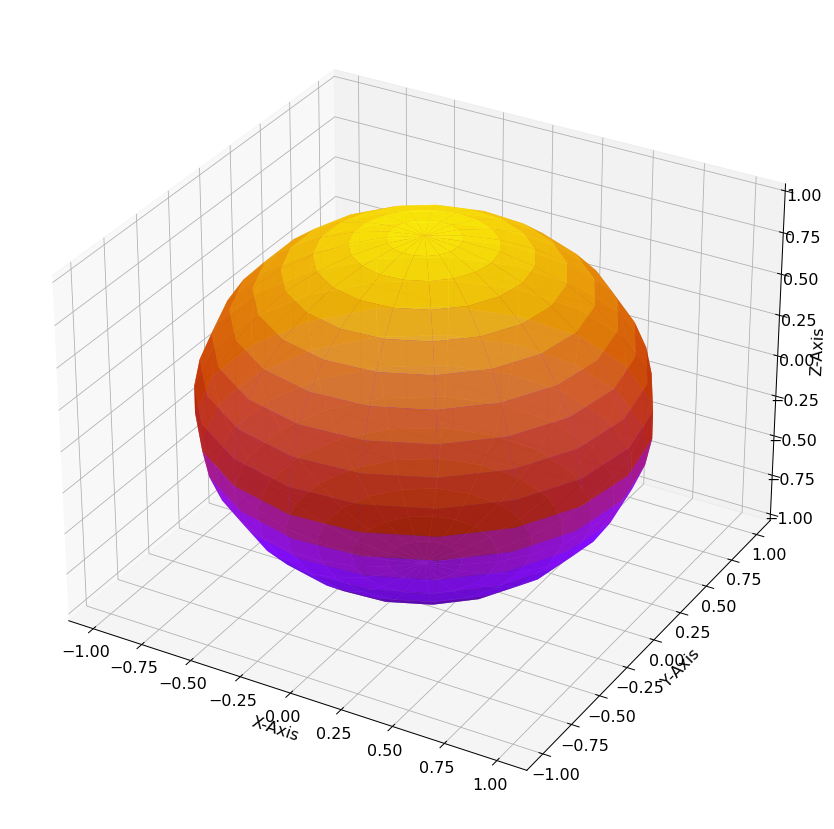

In [83]:
#Initialize and calculate x,y,z components of the surface
sphereR = 1
nVerts = 20j
phi, theta = np.mgrid[0:np.pi:nVerts, 0:2*np.pi:nVerts]
xSph = sphereR * np.sin(phi) * np.cos(theta)
ySph = sphereR * np.sin(phi) * np.sin(theta)
zSph = sphereR * cos(phi)

fig = plt.figure(figsize = (15,15)) #Set figure
axSurf = fig.add_subplot(111, projection='3d') #Add subplot and projection type

axSurf.plot_surface(xSph, ySph, zSph, cmap = 'gnuplot', alpha = 0.8)
axSurf.set_xlabel('X-Axis')
axSurf.set_ylabel('Y-Axis')
axSurf.set_zlabel('Z-Axis')